# <b>Explorer et comprendre les performances des employés</b>

### <b>Problématique</b>

#### Une entreprise souhaite analyser la répartition des performances des employés pour comprendre les écarts et identifier les outliers.

#### <b>But:</b> Étudier les distributions des scores de performance et des heures travaillées pour détecter les facteurs d'amélioration.

<b> Base de données : </b> Human Resources Data Set https://www.kaggle.com/datasets/rhuebner/human-resources-data-set/data

<b> Chargement du fichier </b>

In [1]:
# Importation des bibliothèques
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('HRDataset_v14.csv')

In [3]:
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [4]:
df.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

In [5]:
headers = ['Nom_Employe', 'ID_Emp', 'ID_Marie', 'ID_Status_Marital',
           'ID_Sexe', 'ID_Status_Emp', 'ID_Dept', 'ID_Score_Perf',
           'ID_Recru_Salon_Diversite', 'Salaire', 'ID_Depart', 'ID_Post',
           'Post', 'Etat', 'Code_Postal', 'Date_Nais', 'Sexe', 'Marital',
           'Status_Citoyen', 'Latino_Hispanique', 'Race', 'Date_Embauche',
           'Date_Depart', 'Raison_Depart', 'Status_Empl', 'Departement', 
           'Nom_Manager', 'ID_Manager', 'Source_Recrutment', 'ScorePerformence',
           'Score_Engagement_Emp', 'Satisfaction_Emp', 'Nb_Projets_Speciaux',
           'Date_Dernier_Eval', 'Nb_Jrs_Retard', 'Absence']

In [6]:
df.columns = headers

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Nom_Employe               311 non-null    object 
 1   ID_Emp                    311 non-null    int64  
 2   ID_Marie                  311 non-null    int64  
 3   ID_Status_Marital         311 non-null    int64  
 4   ID_Sexe                   311 non-null    int64  
 5   ID_Status_Emp             311 non-null    int64  
 6   ID_Dept                   311 non-null    int64  
 7   ID_Score_Perf             311 non-null    int64  
 8   ID_Recru_Salon_Diversite  311 non-null    int64  
 9   Salaire                   311 non-null    int64  
 10  ID_Depart                 311 non-null    int64  
 11  ID_Post                   311 non-null    int64  
 12  Post                      311 non-null    object 
 13  Etat                      311 non-null    object 
 14  Code_Posta

In [8]:
df.describe()

,ID_Emp,ID_Marie,ID_Status_Marital,ID_Sexe,ID_Status_Emp,ID_Dept,ID_Score_Perf,ID_Recru_Salon_Diversite,Salaire,ID_Depart,ID_Post,Code_Postal,ID_Manager,Score_Engagement_Emp,Satisfaction_Emp,Nb_Projets_Speciaux,Nb_Jrs_Retard,Absence
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,303.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,10156.000000,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,16.845659,6555.482315,14.570957,4.110000,3.890675,1.218650,0.414791,10.237942
std,89.922189,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,6.223419,16908.396884,8.078306,0.789938,0.909241,2.349421,1.294519,5.852596
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1013.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,10078.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,18.000000,1901.500000,10.000000,3.690000,3.000000,0.000000,0.000000,5.000000
50%,10156.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,19.000000,2132.000000,15.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,10233.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,20.000000,2355.000000,19.000000,4.700000,5.000000,0.000000,0.000000,15.000000
max,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,98052.000000,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000


# <b>Gestion des valeurs manquantes</b>

In [9]:
df_manquantes = df.isnull()

for column in df_manquantes.columns:
    print(df_manquantes[column].value_counts())
    print('')

Nom_Employe
False    311
Name: count, dtype: int64

ID_Emp
False    311
Name: count, dtype: int64

ID_Marie
False    311
Name: count, dtype: int64

ID_Status_Marital
False    311
Name: count, dtype: int64

ID_Sexe
False    311
Name: count, dtype: int64

ID_Status_Emp
False    311
Name: count, dtype: int64

ID_Dept
False    311
Name: count, dtype: int64

ID_Score_Perf
False    311
Name: count, dtype: int64

ID_Recru_Salon_Diversite
False    311
Name: count, dtype: int64

Salaire
False    311
Name: count, dtype: int64

ID_Depart
False    311
Name: count, dtype: int64

ID_Post
False    311
Name: count, dtype: int64

Post
False    311
Name: count, dtype: int64

Etat
False    311
Name: count, dtype: int64

Code_Postal
False    311
Name: count, dtype: int64

Date_Nais
False    311
Name: count, dtype: int64

Sexe
False    311
Name: count, dtype: int64

Marital
False    311
Name: count, dtype: int64

Status_Citoyen
False    311
Name: count, dtype: int64

Latino_Hispanique
False    311
Name: co

In [10]:
df['ID_Manager'].value_counts().idxmax()

18.0

In [11]:
df.replace(np.NaN, 18.0, inplace=True)

In [12]:
df.dtypes

Nom_Employe                  object
ID_Emp                        int64
ID_Marie                      int64
ID_Status_Marital             int64
ID_Sexe                       int64
ID_Status_Emp                 int64
ID_Dept                       int64
ID_Score_Perf                 int64
ID_Recru_Salon_Diversite      int64
Salaire                       int64
ID_Depart                     int64
ID_Post                       int64
Post                         object
Etat                         object
Code_Postal                   int64
Date_Nais                    object
Sexe                         object
Marital                      object
Status_Citoyen               object
Latino_Hispanique            object
Race                         object
Date_Embauche                object
Date_Depart                  object
Raison_Depart                object
Status_Empl                  object
Departement                  object
Nom_Manager                  object
ID_Manager                  

# <b>Recherche de doublons</b>

In [13]:
ligne_double = df[df.duplicated()]
len(ligne_double)

0

# <b>Correction du format de données</b>

In [14]:
remplacement = {
    'MA':'Massachusetts',
    'TX': 'Texas',
    'CT': 'Connecticut',
    'VA': 'Virginia',
    'VT': 'Vermont',
    'AL': 'Alabama',
    'WA': 'Washington',
    'CA': 'California',
    'OH': 'Ohio',
    'IN': 'Indiana',
    'TN': 'Tennessee',
    'NH': 'New Hampshire',
    'RI': 'Rhode Island',
    'PA': 'Pennsylvania',
    'CO': 'Colorado',
    'NY': 'New York',
    'UT': 'Utah',
    'GA': 'Georgia',
    'FL': 'Florida',
    'NC': 'North Carolina',
    'KY': 'Kentucky',
    'ID': 'Idaho',
    'NV': 'Nevada',
    'MT': 'Montana',
    'OR': 'Oregon',
    'ND': 'North Dakota',
    'AZ': 'Arizona',
    'ME': 'Maine'
}

df['Etat'].replace(remplacement, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_14124\1885435273.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Etat'].replace(remplacement, inplace=True)


In [15]:
df['Etat'].unique()

array(['Massachusetts', 'Texas', 'Connecticut', 'Virginia', 'Vermont',
       'Alabama', 'Washington', 'California', 'Ohio', 'Indiana',
       'Tennessee', 'New Hampshire', 'Rhode Island', 'Pennsylvania',
       'Colorado', 'New York', 'Utah', 'Georgia', 'Florida',
       'North Carolina', 'Kentucky', 'Idaho', 'Nevada', 'Montana',
       'Oregon', 'North Dakota', 'Arizona', 'Maine'], dtype=object)

In [16]:
df['Latino_Hispanique'].unique()

array(['No', 'Yes', 'no', 'yes'], dtype=object)

In [17]:
remplac = {
    'no': 'No',
    'yes': 'Yes'
}

df['Latino_Hispanique'].replace(remplac, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_14124\3081074156.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Latino_Hispanique'].replace(remplac, inplace=True)


In [18]:
df['Latino_Hispanique'].unique()

array(['No', 'Yes'], dtype=object)

In [19]:
df.head()

,Nom_Employe,ID_Emp,ID_Marie,ID_Status_Marital,ID_Sexe,ID_Status_Emp,ID_Dept,ID_Score_Perf,ID_Recru_Salon_Diversite,Salaire,...,Nom_Manager,ID_Manager,Source_Recrutment,ScorePerformence,Score_Engagement_Emp,Satisfaction_Emp,Nb_Projets_Speciaux,Date_Dernier_Eval,Nb_Jrs_Retard,Absence
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [20]:
df.to_csv('HRDataset.csv', index=False)

# <b>Analyse Exploratoire des données (AED)</b>

In [21]:
df.describe()

,ID_Emp,ID_Marie,ID_Status_Marital,ID_Sexe,ID_Status_Emp,ID_Dept,ID_Score_Perf,ID_Recru_Salon_Diversite,Salaire,ID_Depart,ID_Post,Code_Postal,ID_Manager,Score_Engagement_Emp,Satisfaction_Emp,Nb_Projets_Speciaux,Nb_Jrs_Retard,Absence
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,10156.000000,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,16.845659,6555.482315,14.659164,4.110000,3.890675,1.218650,0.414791,10.237942
std,89.922189,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,6.223419,16908.396884,7.991905,0.789938,0.909241,2.349421,1.294519,5.852596
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1013.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,10078.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,18.000000,1901.500000,10.000000,3.690000,3.000000,0.000000,0.000000,5.000000
50%,10156.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,19.000000,2132.000000,16.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,10233.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,20.000000,2355.000000,19.000000,4.700000,5.000000,0.000000,0.000000,15.000000
max,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,98052.000000,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000


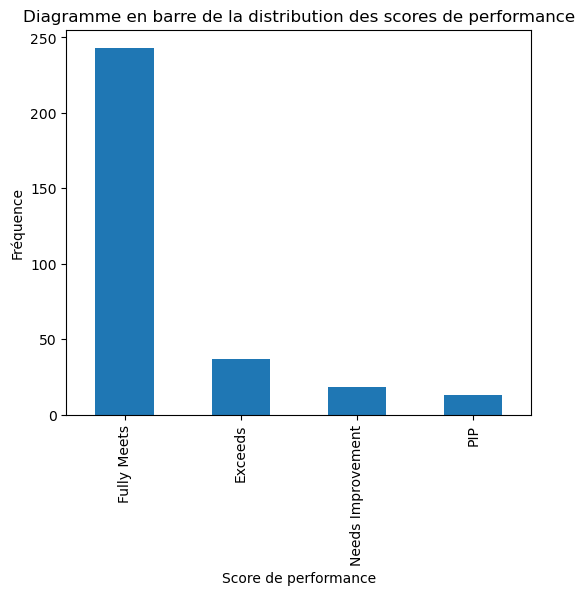

In [22]:
df['ScorePerformence'].value_counts().plot(kind='bar', figsize=(6,5))

# afficher le titre 
plt.title('Diagramme en barre de la distribution des scores de performance')
plt.xlabel('Score de performance')
plt.ylabel('Fréquence')

# afficher le tracé
plt.show()

<b>Remarque :</b> La majorité des employés font bien leur travail comme prévu ce qui indique un signe positif de compétence
- très peu d'employés font mieux ce qu'on attend d'eux ou sont en risque de départ

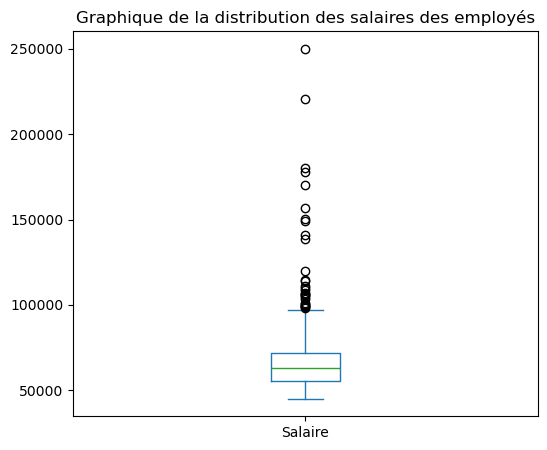

In [23]:
df['Salaire'].plot(kind='box', figsize=(6,5))

# Afficher le titre 
plt.title('Graphique de la distribution des salaires des employés')

# tracé le graphique
plt.show()

<b>Remarque: </b> sur le graphique des salaires des employés
* la médiane est environ 65000 ce qui la moitié des employés gagne moins ou plus que ce montant
* le 1er quartile est autour de 55000 indique que 25% des employés ont un salaire inférieur à cet montant
* le 3e quartile est autour de 70000 signifi que 75% des employés gagne moins que ce montant
* on observe les données asymetrique, ce qui indique que les données des salaires sont concentré vers le bas, en plus on constate également des valeurs abbérantes c'est à dire des salaires très élevés par rapport au reste des employés ce qui peut refleter des postes de hautes responsabilités ou primes exceptionnelles 

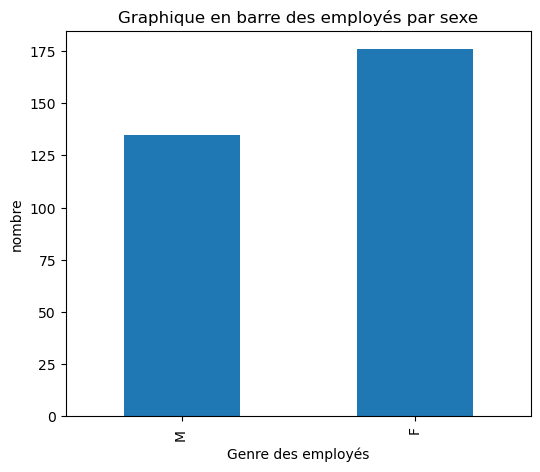

In [24]:
df['Sexe'].value_counts().sort_values().plot(kind='bar', figsize=(6,5))

# afficher les titre 
plt.title('Graphique en barre des employés par sexe')
plt.xlabel('Genre des employés')
plt.ylabel('nombre')

# afficher le tracé
plt.show()

<b>Remarque : </b> La majorité des employés est constitués de femmes avec 57% contre 43% chez les hommes 

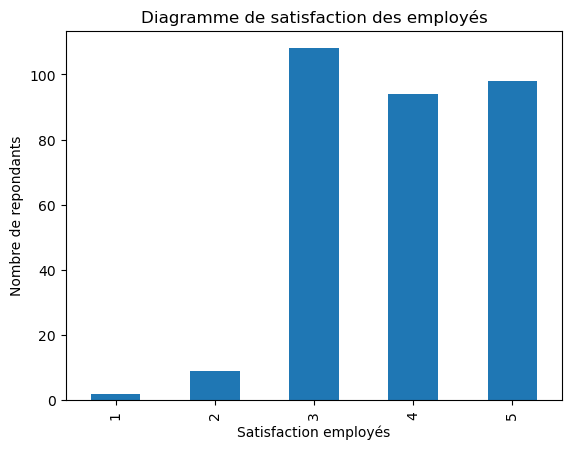

In [25]:
df['Satisfaction_Emp'].value_counts().sort_index().plot(kind='bar')

# Afficher le titre
plt.title('Diagramme de satisfaction des employés')
plt.xlabel('Satisfaction employés')
plt.ylabel('Nombre de repondants')

# afficher le tracé
plt.show()

<b>Remarque :</b> Le niveau de satisfaction des employés est de  globalement bonne à très bonne
- Ce indique un sentiment positif ou au moins acceptable vis à vis de leur travail
- En resumé pas de problème majeur, juste chercher à faire progresser la note à très satisfait

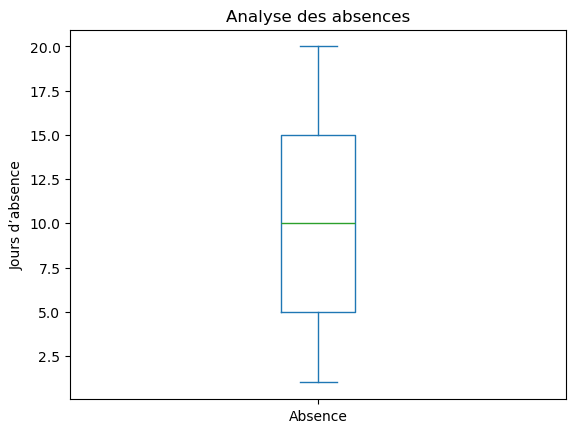

In [26]:
df['Absence'].plot(kind='box')
plt.title('Analyse des absences')
plt.ylabel('Jours d’absence')
plt.show()

<b>Remarque :</b> sur le graphique des absences
- la médiane est d'environ 10 jours d'absence, ce qui indique que la moitié des employés ont moins de jours d'absence ou plus 
- le 1er quartile est autour 2.5 jours ce que indique que 25% des employés ont très peu d'abscence
- le 3e quartile est autour 15 jours ce qui indique que 75% des employés ont moins de 15 jours d'absence
- la répartition des données semble centré autour de la médiane ce qui signifie une distribution symétrique.
- <b>En clair :</b> l'absentéisme est modérée sur une majorité se situant entre 2 à 15 jours d'absence sur la période.

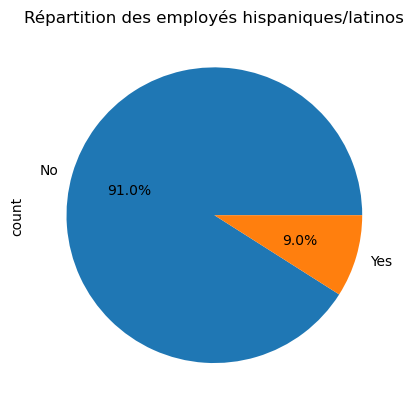

In [27]:
df['Latino_Hispanique'].value_counts().plot(kind='pie', autopct='%1.1f%%')

# afficher le titre
plt.title('Répartition des employés hispaniques/latinos')

# afficher le tracé
plt.show()

<b>Remarque :</b> La majorité des employés indique qu'il ne sont hispanique ou latinos. En revanche 9% le sont.

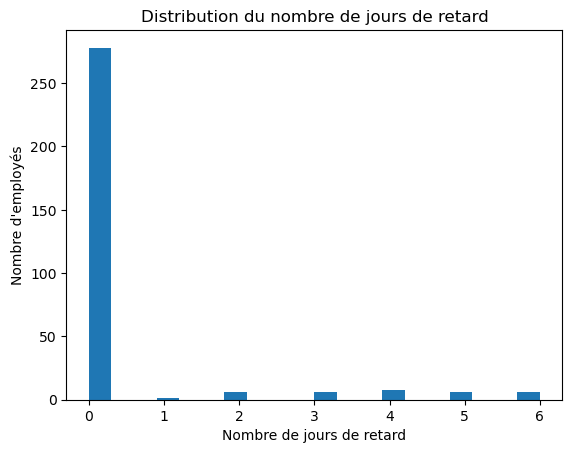

In [28]:
df['Nb_Jrs_Retard'].plot(kind='hist', bins=20)

plt.title("Distribution du nombre de jours de retard")
plt.xlabel("Nombre de jours de retard")
plt.ylabel("Nombre d'employés")
plt.show()

<b>Remarque : </b> la distribution est fortement asymétrique avec un pic sur 0 , ce qui indique que la majorité des employés n'accuse pas de retard
- le reste est très bas ce qui signifie que très peu d'employé vienne en retard
- <b>En clair :</b> cela ce traduit par une bonne ponctualité des employés dans cette entreprise

<Axes: xlabel='Nb_Projets_Speciaux'>

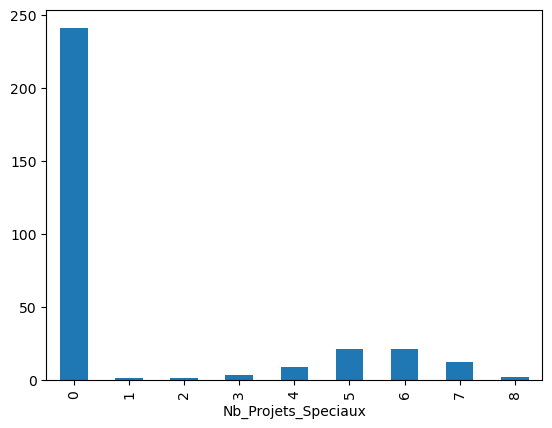

In [29]:
df['Nb_Projets_Speciaux'].value_counts().sort_index().plot(kind='bar')

<b>Remarque :</b> On constate que la majorité des employés ne font pas de projets spéciaux ce qui indique que ces projets concernent un groupe restreint
- le reste est très faible 
- En resumé : les projets ne concernent qu'un groupe restreint, ayant une spécialité ou une responsabilité

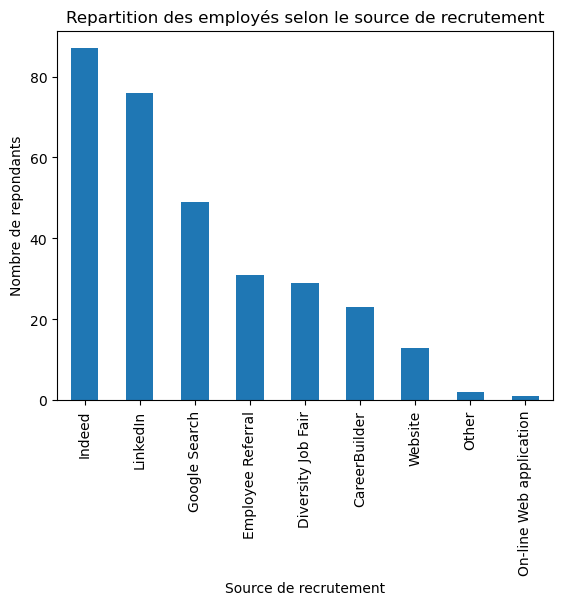

In [32]:
df['Source_Recrutment'].value_counts().plot(kind='bar')

# afficher le titre 
plt.title('Repartition des employés selon le source de recrutement')
plt.xlabel('Source de recrutement')
plt.ylabel('Nombre de repondants')

# afficher le tracé
plt.show()

<b>Remarque : </b> la majorité des employés ont été recrutement sur les canaux des réseaux, ce qui indique que l'entreprise recrute beaucoup plus via les réseaux sociaux
- le reste est très peu à travers le site web et autres.


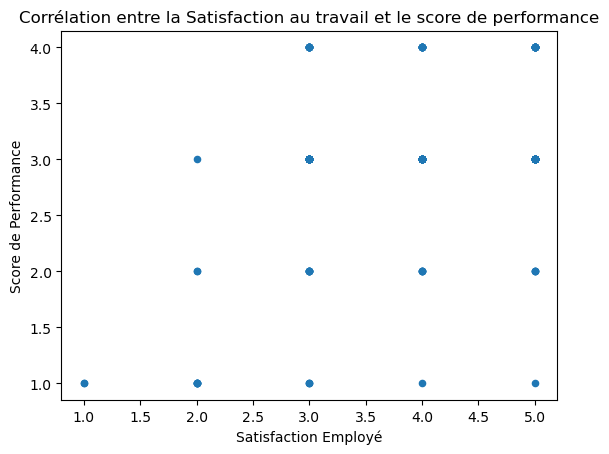

In [44]:
df.plot(kind='scatter', x='Satisfaction_Emp', y='ID_Score_Perf')

# afficher le titre 
plt.title('Corrélation entre la Satisfaction au travail et le score de performance')
plt.xlabel('Satisfaction Employé')
plt.ylabel('Score de Performance')

plt.show()

In [43]:
Perfor_Satisfact = df[['Satisfaction_Emp', 'ID_Score_Perf']].corr()
Perfor_Satisfact

,Satisfaction_Emp,ID_Score_Perf
Satisfaction_Emp,1.000000,0.303579
ID_Score_Perf,0.303579,1.000000


<b>Remarque : </b> on constate une faible corrélation positive entre la satisfaction des employés et leur performance
<b>Resumé: </b> La satisfaction des employés contribuerait modérerement à la performance 

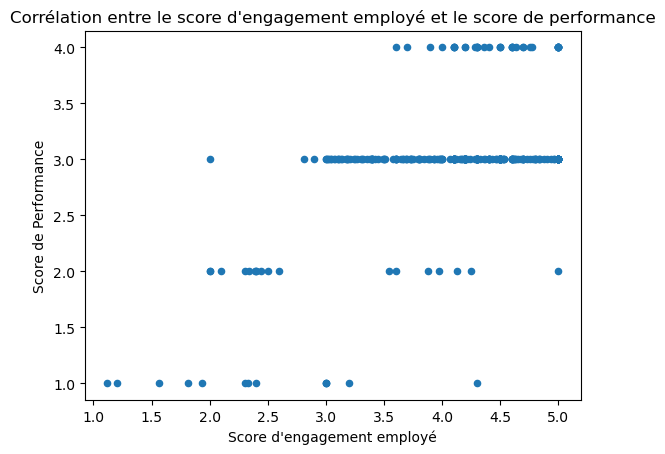

In [46]:
df.plot(kind='scatter', x='Score_Engagement_Emp', y='ID_Score_Perf')

# afficher le titre 
plt.title("Corrélation entre le score d'engagement employé et le score de performance")
plt.xlabel("Score d'engagement employé")
plt.ylabel('Score de Performance')

plt.show()

In [47]:
Perfor_engagem = df[['Score_Engagement_Emp', 'ID_Score_Perf']].corr()
Perfor_engagem

,Score_Engagement_Emp,ID_Score_Perf
Score_Engagement_Emp,1.000000,0.544927
ID_Score_Perf,0.544927,1.000000


<b>Remarque: </b> on constate une corrélation positive ce qui signifie que si l'engagement augmente la performance augmente aussi
- <b>En clair: </b> Si le niveau d'engagement  augmente ça pourrait entrainer une meilleur performance

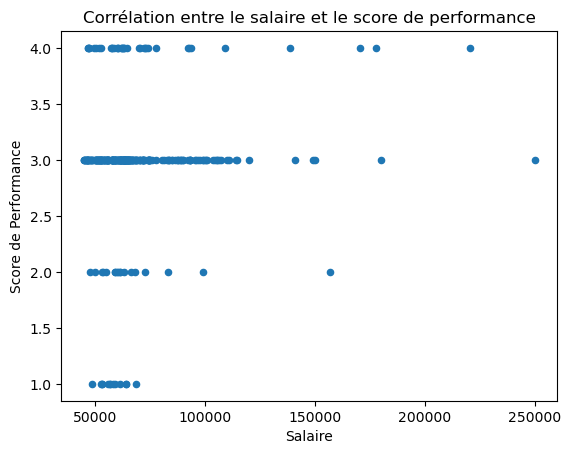

In [48]:
df.plot(kind='scatter', x='Salaire', y='ID_Score_Perf')

# afficher le titre 
plt.title("Corrélation entre le salaire et le score de performance")
plt.xlabel("Salaire")
plt.ylabel('Score de Performance')

plt.show()

In [49]:
Perfor_salaire = df[['Salaire', 'ID_Score_Perf']].corr()
Perfor_salaire

,Salaire,ID_Score_Perf
Salaire,1.000000,0.130903
ID_Score_Perf,0.130903,1.000000


<b>Remarque :</b> on constate une corrélatin 0.13 ce qui indique une relation très faible entre le salaire et la performance
<b>En conclusion :</b> Une augmentation salaire ne semble pas améliorer la performance globale

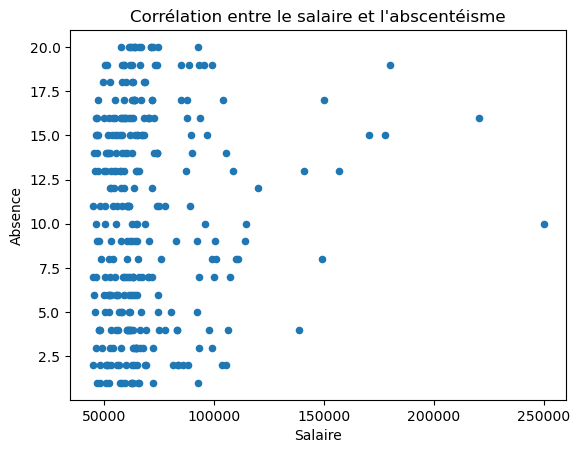

In [50]:
df.plot(kind='scatter', x='Salaire', y='Absence')

# afficher le titre 
plt.title("Corrélation entre le salaire et l'abscentéisme")
plt.xlabel("Salaire")
plt.ylabel('Absence')

plt.show()

In [52]:
Absence_salaire = df[['Salaire', 'Absence']].corr()
Absence_salaire

,Salaire,Absence
Salaire,1.000000,0.082382
Absence,0.082382,1.000000


<b>Remarque :</b> La corrélation entre le salaire et l’absence est très faible (0,08), ce qui indique qu’il n’existe quasiment pas de lien entre ces deux variables.

<b>Conclusion : </b>L’absence modérée des employés ne semble pas avoir d’impact significatif sur la performance globale de l’entreprise.

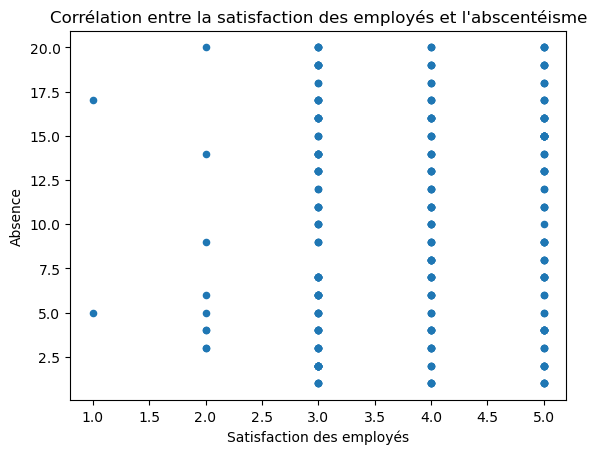

In [53]:
df.plot(kind='scatter', x='Satisfaction_Emp', y='Absence')

# afficher le titre 
plt.title("Corrélation entre la satisfaction des employés et l'abscentéisme")
plt.xlabel("Satisfaction des employés")
plt.ylabel('Absence')

plt.show()

In [54]:
Absence_satisfaction = df[['Satisfaction_Emp', 'Absence']].corr()
Absence_satisfaction

,Satisfaction_Emp,Absence
Satisfaction_Emp,1.000000,0.075222
Absence,0.075222,1.000000


<b>Remarque :</b> La corrélation entre le satisfaction des employés  et l’absence est très faible (0,07), ce qui indique qu’il n’existe quasiment pas de lien entre ces deux variables.

<b>Conclusion : </b>L’absence modérée des employés ne semble pas avoir d’impact sur la satisfaction des employés.

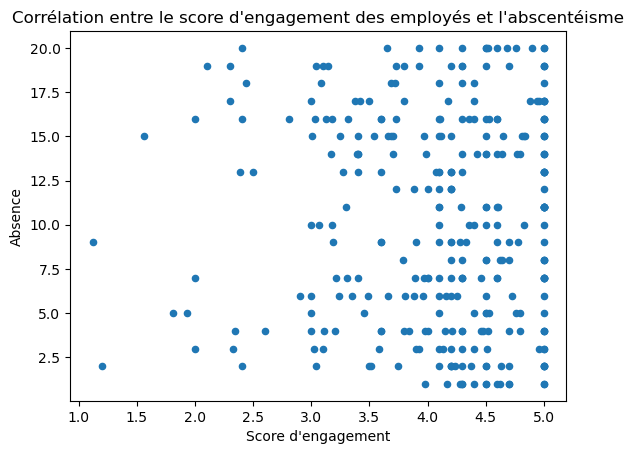

In [55]:
df.plot(kind='scatter', x='Score_Engagement_Emp', y='Absence')

# afficher le titre 
plt.title("Corrélation entre le score d'engagement des employés et l'abscentéisme")
plt.xlabel("Score d'engagement")
plt.ylabel('Absence')

plt.show()

In [56]:
Absence_engagement= df[['Score_Engagement_Emp', 'Absence']].corr()
Absence_engagement

,Score_Engagement_Emp,Absence
Score_Engagement_Emp,1.000000,-0.008771
Absence,-0.008771,1.000000


<b>Remarque :</b> La corrélation entre l'engagement des employés et l’absence est très faible (-0,008), ce qui indique qu’il n’existe quasiment pas de lien entre ces deux variables.

<b>Conclusion :</b> L’absence modérée des employés ne semble pas avoir un impact sur leur niveau de motivation.


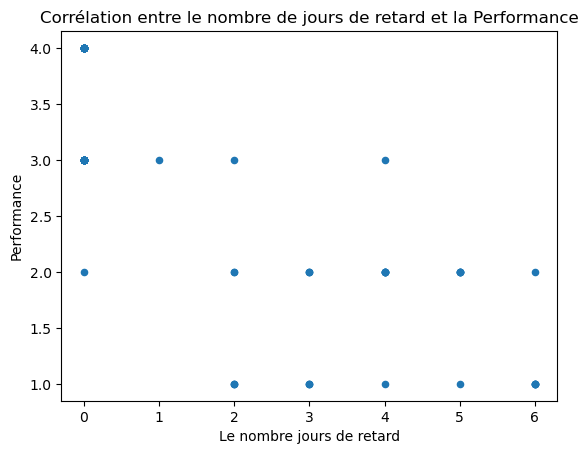

In [60]:
df.plot(kind='scatter', x='Nb_Jrs_Retard', y='ID_Score_Perf')

# afficher le titre 
plt.title("Corrélation entre le nombre de jours de retard et la Performance")
plt.xlabel("Le nombre jours de retard")
plt.ylabel('Performance')

plt.show()

In [59]:
Perform_nb_projet= df[['Nb_Jrs_Retard', 'ID_Score_Perf']].corr()
Perform_nb_projet

,Nb_Jrs_Retard,ID_Score_Perf
Nb_Jrs_Retard,1.000000,-0.734728
ID_Score_Perf,-0.734728,1.000000


<b>Remarque :</b> La corrélation entre le nombre de jours de retard et la performance est négativement forte (-0,73), ce qui indique qu’il existe un lien négatif entre ces deux variables.

<b>Conclusion :</b> Le retard des employés semble avoir un impact négatif significatif sur la performance.